# Проект спринта 'Исследовательский анализ данных'

Датасет - архив Яндекс Недвижимости для Санкт-Петербурга и пригородов.

Задачи проекта - обработать данные, построить и проанализировать графики, описать обнаруженные закономерности и особенности (в т.ч. факторы, влияющие на стоимость квартир).

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('\datasets\real_estate_data.csv', sep='\t')

In [3]:
# выводим на экран таблицу
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

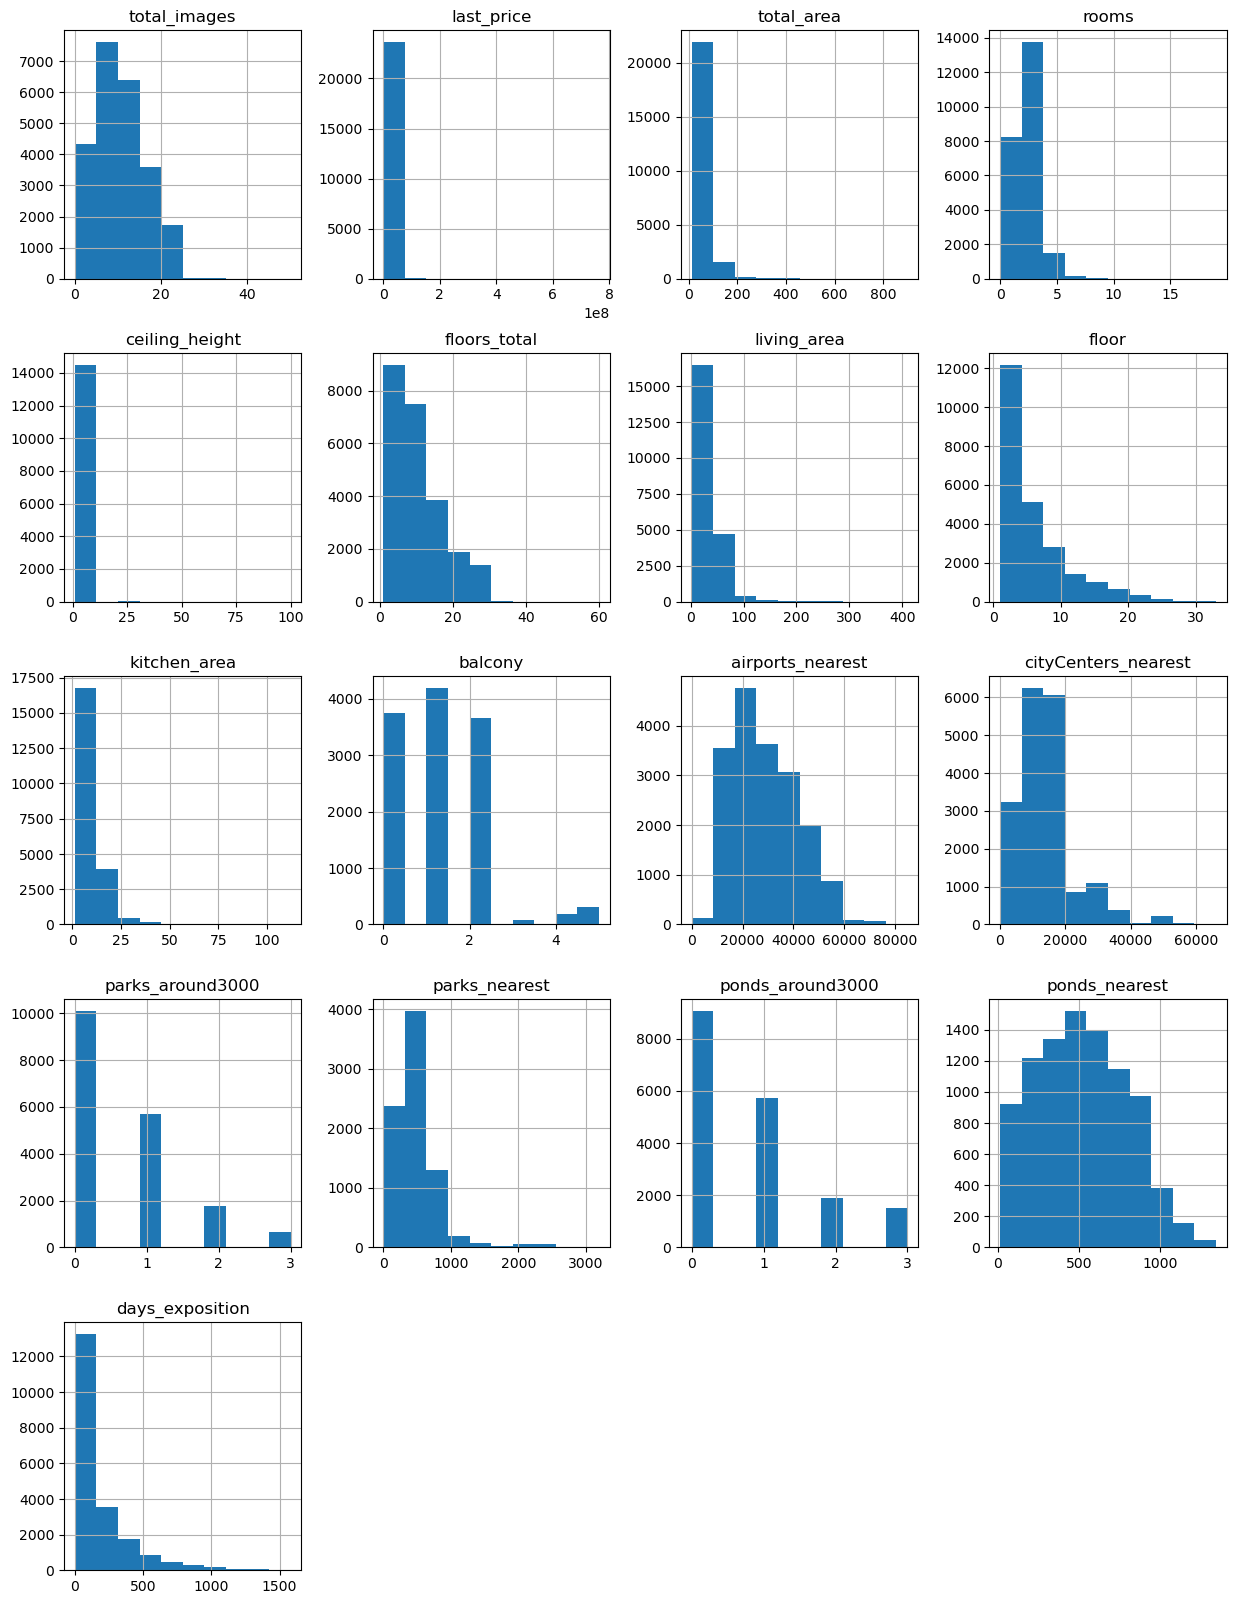

In [5]:
data.hist(figsize=(15, 20))
plt.show()

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Первичный анализ датасета показывает, что данные в нем нуждаются в предварительной обработке.
Необходимо сделать следующее:
* обработать пропуски (имеются в нескольких столбцах)
* изучить аномальные выбросы в столбце ceiling_height
* конвертировать значения в first_day_exposition в datetime
* найти возможные дубликаты в localyty_name

# Предобработка данных

## Обработка пропущенных значений

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в данных встречаются в 14 столбцах.
По условию задания все параметры делятся на две группы - пользовательские, т.е. добавленные продавцом при размещении объявления, и картографические.

1. Пользовательские параметры с пропусками
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name

Параметр is_apartment предполагает только два значения - True и False. Пропущенное значение, скорее всего, означает, что объект не относится к аппартаментам. Пропуск можно заменить на False.

In [8]:
data['is_apartment'].fillna(False, inplace=True)

Параметр balcony означает количество балконов и пропущенное значение, скорее всего, означает, что балконов на объекте нет. Пропуск можно заменить числом 0.

In [9]:
data['balcony'].fillna(0, inplace=True)

In [10]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Параметр locality_name - это название населенного пункта. Параметр носит категориальный характер, и заменить пропуски каким-либо средним значением нельзя.
Надо отметить, что таких пропусков всего 49, т.е. 0.21% от всех записей. Записи без названий населенных пунктов можно исключить. Однако, датафрейм содержит очень много населенных пунктов, в т.ч. небольших и, возможно, удаление записей повлияет на качество дальнейших шагов исследования. Оставим пропуски без изменений.

Заменим пропуски в параметре ceiling_height на медианное значение.

In [11]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Пропуски в столбце floors_total заменим на медианное значение или на значение в столбце floor, если оно будет больше медианы floors_total.

In [12]:
# создаем 2 среза с пропусками в floors_total
flats_under_median = data.loc[
    ((data['floors_total'].isna() & (data['floor'] <= data['floors_total'].median())))
].copy()

flats_above_median = data.loc[
    ((data['floors_total'].isna() & (data['floor'] > data['floors_total'].median())))
].copy()

# заполняем пропуски в каждом срезе
flats_under_median['floors_total'].fillna(data['floors_total'].median(), inplace=True)
flats_above_median['floors_total'].fillna(data['floor'], inplace=True)

# объединяем срезы и получаем заполненный floors_total
floors_total_values = pd.concat([flats_under_median, flats_above_median])['floors_total']

data['floors_total'].fillna(floors_total_values, inplace=True)

Пропуски в столбцах living_area и kitchen_area оставим без изменений. Заполнить их корректными значениями сложно. Датасет содержит целых три параметра, касающихся площади - кроме названных, еще и total_area. В результате заполнения пропусков значения всех трех параметров должны соответствовать друг другу, например, сумма living_area и kitchen_area не должны превышать total_area.

При этом пропусков в total_area нет и пропуски в living_area и kitchen_area не должны повлиять на ход нашего исследования.

Пропуски параметров parks_around3000 и ponds_around3000 следует заменить числом 0. Скорее всего, пропуск означает, что в радиусе 3 000 м от квартиры нет парка или пруда.

In [13]:
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)

Пропуски в параметре days_exposition невозможно объяснить однозначно. Их много - 3 181 пропуск. Они могут быть вызваны технической ошибкой. И они могут означать, что квартира все еще не снята с публикации.
Оставим пропуски данного параметра без изменений.

## Обработка типов данных

Значения в столбце first_day_exposition представлены в виде строк. Переведем их в тип datetime.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

В столбцах floors_total и balcony тип данных - float. Однако, количество этажей и балконов должно быть выражено целым числом. Конвертируем float в int.

In [15]:
data['balcony'] = data['balcony'].apply(lambda value: int(value))

data['floors_total'] = data['floors_total'].apply(lambda value: int(value))

## Обработка дубликатов в данных

Датасет содержит очень большой список населенных пунктов - 364 уникальных значения. Неявные дубликаты встречаются в разных вариантах. Например, посЕлок и посЁлок, Мурино и поселок Мурино, Кудрово и деревня Кудрово.
Вручную такой объем наименований обработать трудно, поэтому напишем функцию, которая обработает столбец locality_name. Исключим из наименований виды населенных пунктов и оставим только их названия. Это допустимо, потому что, во-первых, некоторые населенные пункты уже приведены без указания вида (Санкт-Петербург, Петергоф и т.д.), а, во-вторых, задачи исследования позволяют такое упрощение.

In [16]:
def normalize_name(name):
    name_search_response = re.search('[А-Я]', name)
    if name_search_response is not None:
        name_start_index = name_search_response.span()[0]
        return name[name_start_index:]
    else:
        return name

data['locality_name'] = data['locality_name'].map(normalize_name, na_action='ignore')

## Обработка аномальных значений

### ceiling_height

Столбец ceiling_height содержит следующие аномальные значения:
- потолки свыше 10 м, например, 25 м, и даже одно значение 100 м
- потолки ниже 2 м, например, 1 м

Значения выше 10 м, скорее всего, выражены в дециметрах. Такие значение переведем в метры, а значения менее 2 м удалим.

In [17]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda height: height if height < 10 else height / 10)
data = data.query('ceiling_height >= 2')

### floors_total

Столбец floors_total содержит два, скорее всего, аномальных значения - 52 и 60 этажей. Исключим их. В датасете останутся значения этажей <= 36.

In [18]:
data = data.query('floors_total <= 36')

### airports_nearest

В столбце airports_nearest удалим запись со значением 0.

In [19]:
data = data.query('airports_nearest != 0')

### last_price

Диапозон значений в столбце last_price очень большой - от 12 190 рублей до 763 000 000 миллионов рублей. Можно предположить, что анализировать данные с таким разбросом неудобно, потому что аномальные значения будут влиять на ход работы, в т.ч. на визуализацию данных.

Минимальное значение этого столбца - 12 190 рублей, после него сразу значение 430 000 рублей. Удалим эту запись, так как она в рамках нашего датасета совершенно не информативна и является аномальным значением.

In [20]:
data = data.query('last_price >= 430000')

Построим диаграмму размаха, чтобы определить верхний предел нормальных значений, выше которого начинаются выбросы.

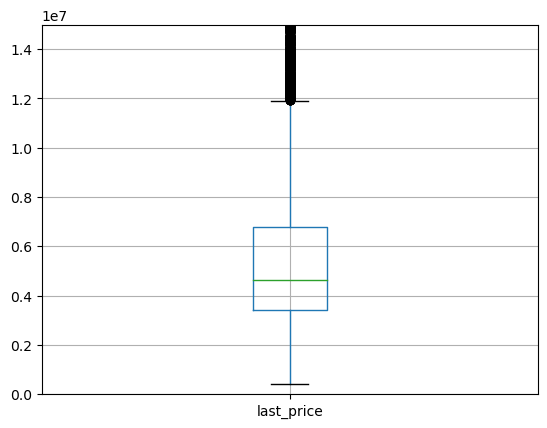

In [21]:
plt.ylim(0, 15000000)
data.boxplot(column=['last_price'])
plt.show()

Диаграмма размаха позволяет определить верхнюю границу нормальных значений, которая находится в районе 12 000 000 рублей. Исключим из датасета объекты, стоимость которых превышает это значение.

In [22]:
data = data.query('last_price < 12000000')

## Вычисление дополнительных параметров

In [23]:
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2)

In [24]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [25]:
def set_floor_type(row):
    if row['floor'] == 1:
         return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(set_floor_type, axis='columns')

In [26]:
data['cityCenters_nearest_by_km'] = round(data['cityCenters_nearest'] / 1000)

## Исследовательский анализ данных

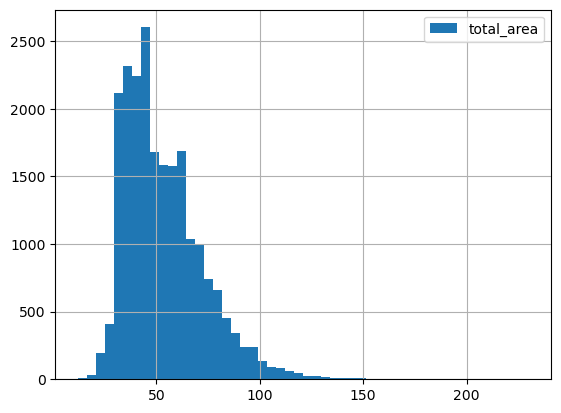

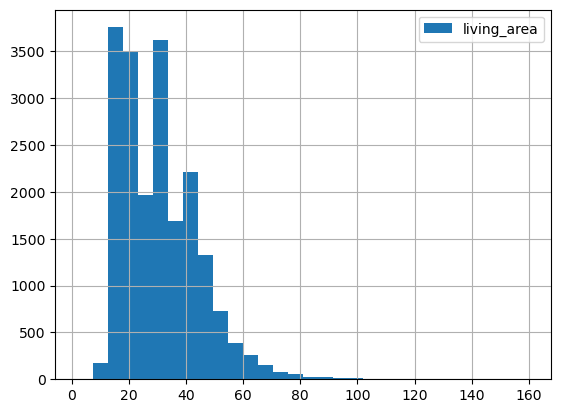

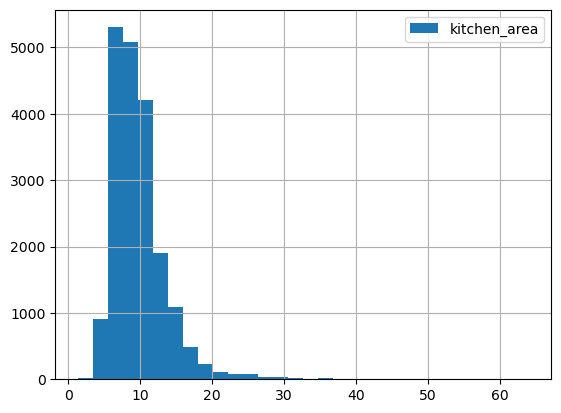

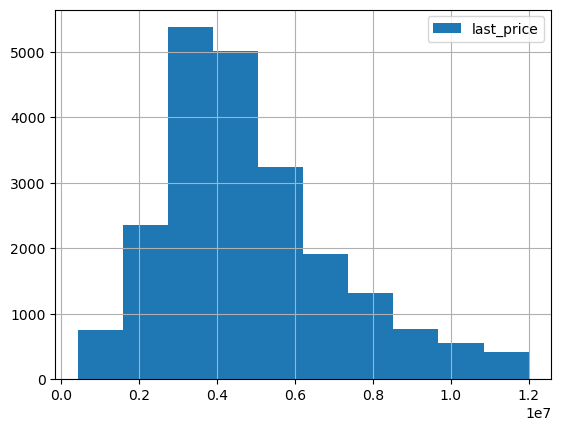

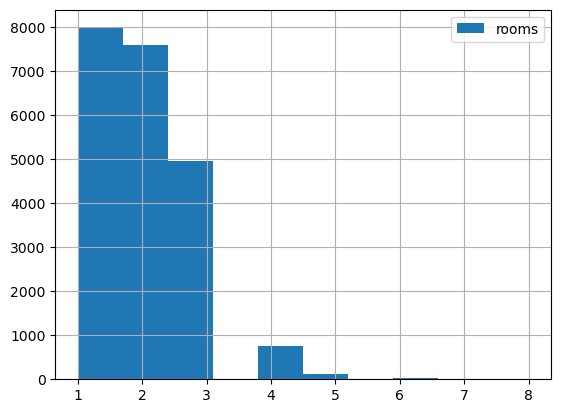

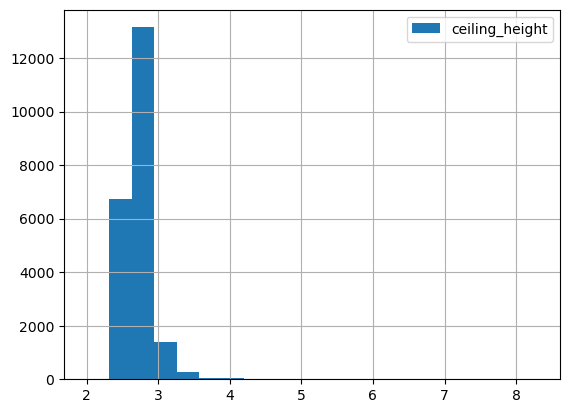

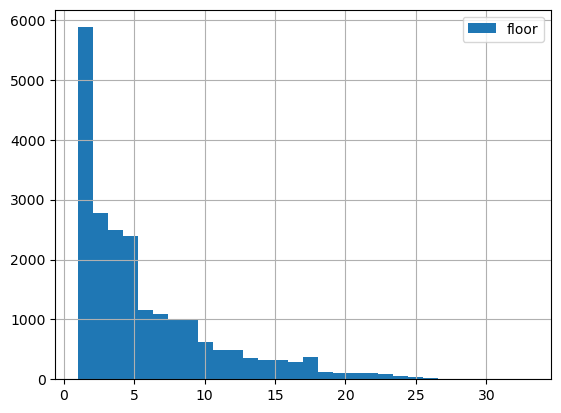

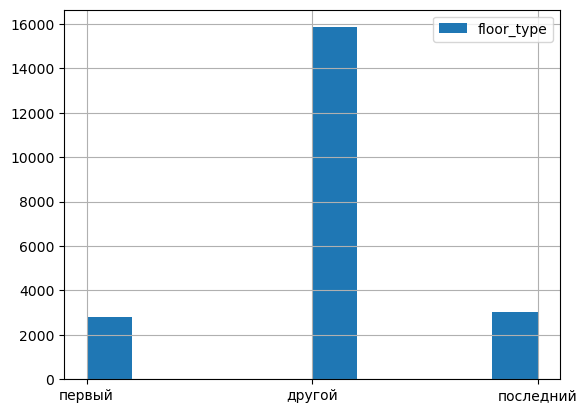

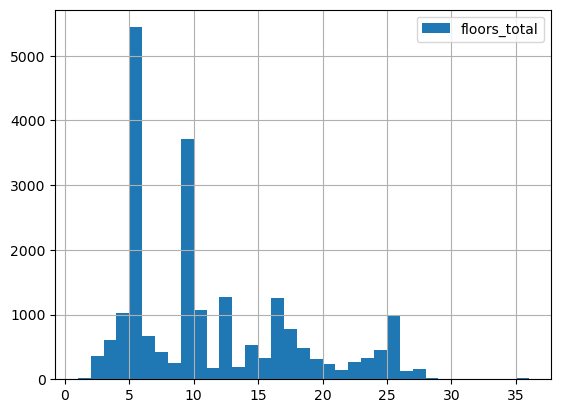

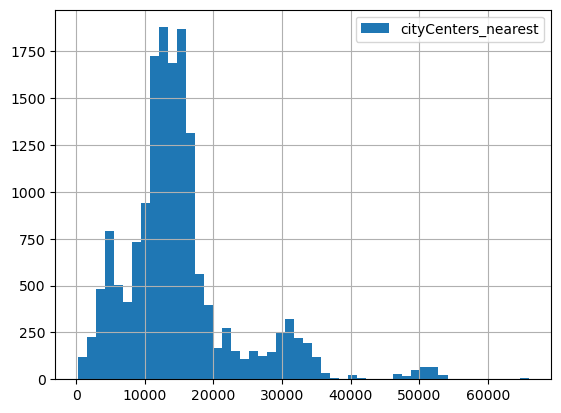

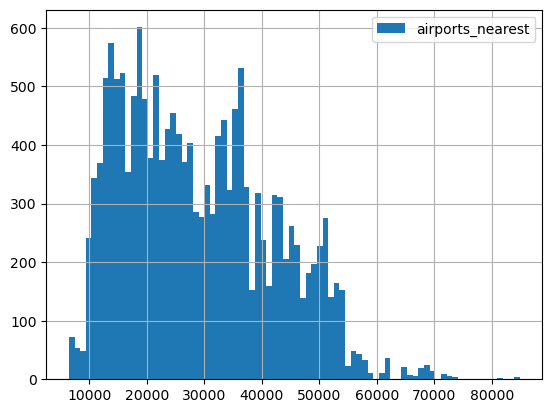

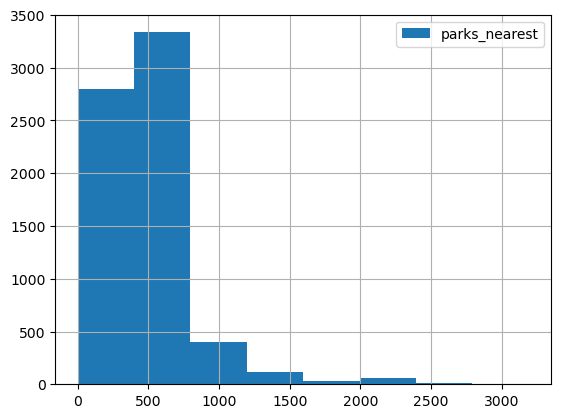

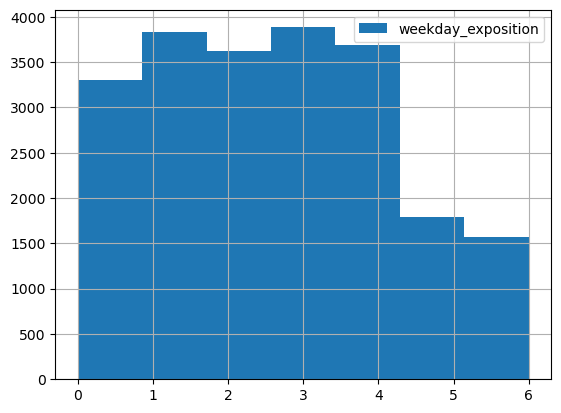

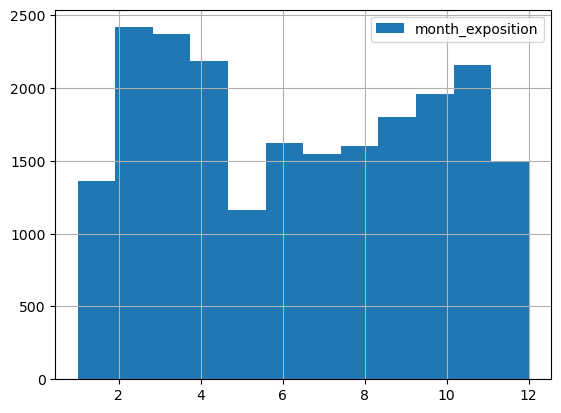

In [27]:
data['total_area'].hist(bins=50, legend=True)
plt.show()
data['living_area'].hist(bins=30, legend=True)
plt.show()
data['kitchen_area'].hist(bins=30, legend=True)
plt.show()
data['last_price'].hist(legend=True)
plt.show()
data['rooms'].hist(range=(1, 8), legend=True)
plt.show()
data['ceiling_height'].hist(bins=20, legend=True)
plt.show()
data['floor'].hist(bins=30, legend=True)
plt.show()
data['floor_type'].hist(bins=10, legend=True)
plt.show()
data['floors_total'].hist(bins=35, legend=True)
plt.show()
data['cityCenters_nearest'].hist(bins=50, legend=True)
plt.show()
data['airports_nearest'].hist(bins=80, legend=True)
plt.show()
data['parks_nearest'].hist(bins=8, legend=True)
plt.show()
data['weekday_exposition'].hist(bins=7, legend=True)
plt.show()
data['month_exposition'].hist(bins=12, legend=True)
plt.show()

### total_area
основной объем квартир в датасете составляют квартиры площадью до 100 кв м. Наибольшее количество - квартиры от 30 до 50 кв м

### living_area
основной объем в датасете составляют квартиры c жилой площадью до 80 кв м. Есть максимальный пик - квартиры с жилой площадью 15-25 кв м

### kitchen_area
основной объем в датасете составляют квартиры c площадью кухни до 20 кв м. Есть максимальный пик - квартиры с жилой площадью 15-25 кв м

### last_price
основной объем в датасете составляют квартиры стоимостью до 800 тыс.

### rooms
одно- и двухкомнатные квартиры содержатся в датасете в равном количестве - около 8 тыс. Количество трехкомнатных квартир ниже - немного менее 6 000. Количество четырехкомнатных квартир - более 1 000.

### ceiling_height
Большинство значений высоты потолков - 2.5-3 м. Незначительная доля приходится на потолки до 3.5 м. Доля потолков большей высоты очень мала.

### floor
Большинство квартир на 1 этаже - более 6 000. Квартиры на 2-4 этажах - от 3 000 до 2 000 соответственно. На5-10 этажах - примерно по 1 000. После 10 этажа происходит плавное снижение количества квартир.

### floor_type
Квартиры на первом и последнем этажах - в равном количестве, остальные отнесены к категории "другие".

### floor_total
Пяти- и девятиэтажные дома составлят значительное большинство.

### cityCenters_nearest
Большинство квартир находится в пределах 30 км от центра города. На гистограмме имеется пик в районе 30 км - почти 6 000 объектов. Очевидно, этот выброс дают объекты, где NaN был заменен на медианное значение.

### airports_nearest
Большинство квартир равномерно распределены на расстоянии между 10 и 55 км от аэропорта. На гистограмме имеется пик в районе 26 км - 6 000 объектов. Очевидно, этот выброс также дают объекты, где NaN был заменен на медианное значение.

### parks_nearest
Ближайший парк у большинства объектов - не далее 800 м.

### weekday_exposition
До середины недели наблюдается рост количества размещений объявлений, в пятницу происходит снижение. В субботу и воскресенье размещается примерно в два раза меньше объявлений, чем в другие дни.

### month_exposition
В начале года, начиная с февраля, наблюдается наибольшее количество размещений объявлений. В начале лета происходит существенный спад, а затем плавный рост до декабря. В декабре и январе количество объявлений находится на том, же уровне, что и в летние месяцы.

### Анализ скорости продаж

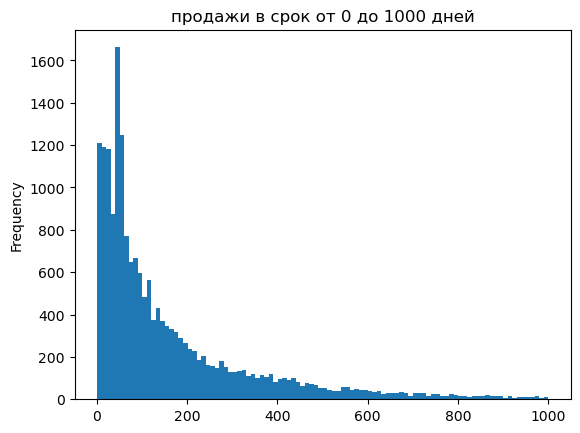

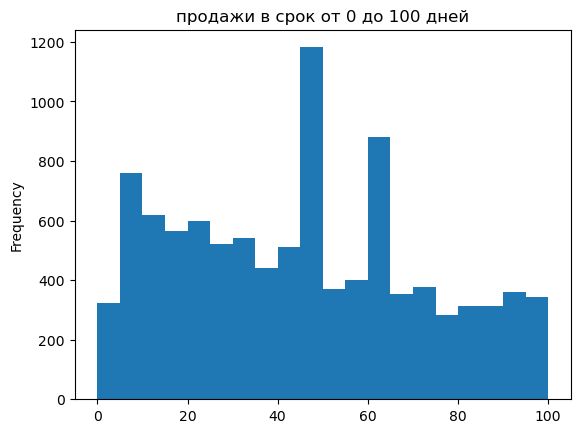

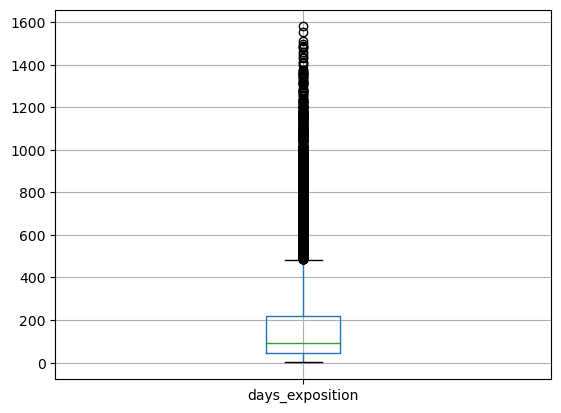

среднее арифметическое значение:  174
медианное значение:  92
count    19048.000000
mean       173.509870
std        211.971119
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [28]:
data['days_exposition'].plot(kind='hist', bins=100, range=(1, 1000), title='продажи в срок от 0 до 1000 дней')
plt.show()
data['days_exposition'].plot(kind='hist', bins=20, range=(0, 100), title='продажи в срок от 0 до 100 дней')
plt.show()
data.boxplot(column=['days_exposition'])
plt.show()

print('среднее арифметическое значение: ', round(data['days_exposition'].mean()))
print('медианное значение: ', round(data['days_exposition'].median()))

print(data['days_exposition'].describe())

Диапазон значений days_exposition очень широк - от 1 дня до 1580 дней.
Пик значений на графике распределения смещен влево (распределение Пуассона). При этом в периоде 30-40 дней наблюдается резкий провал (800 значений), а в периоде 40-50 дней, наоборот, резкое увеличение до 1700.

Медианное значение days_exposition - 95 дней.

Построенные графики позволяют рассматривать продажи, совершенные в срок до 45 дней, как быстрые.

Диаграмма размаха показывает, что максимальная граница нормальных значений находится на уровне 500 дней. Поэтому необычно долгими можно считать продажи, совершенные за больший срок.

### Анализ влияния отдельных факторов на стоимость квартир

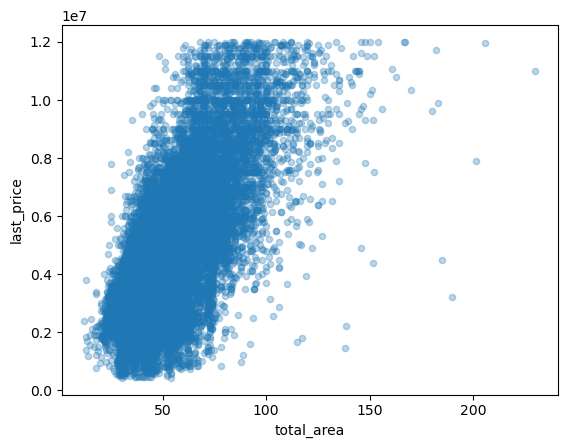

коэффициент корреляции: 0.7018370357807305


In [29]:
data.plot(kind='scatter', x='total_area', y='last_price', alpha=0.3)
plt.show()

print('коэффициент корреляции:', data['last_price'].corr(data['total_area']))

Диаграмма позволяет говорить о положительной корреляции общей площади квартиры и ее стоимости. Коэффициент корреляции 0.7, что говорит о наличии существенной линейной связи между этими параметрами.

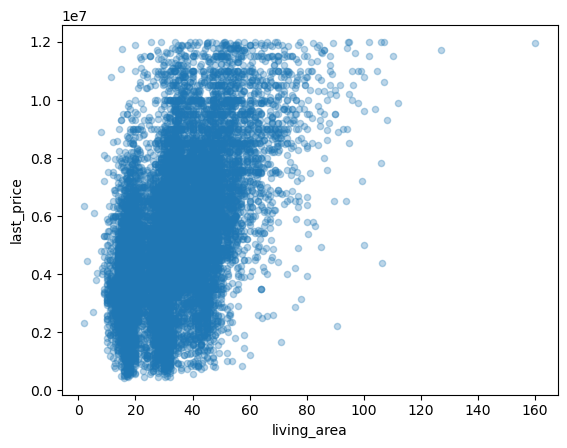

коэффициент корреляции: 0.585988240961311


In [30]:
data.plot(kind='scatter', x='living_area', y='last_price', alpha=0.3)
plt.show()

print('коэффициент корреляции:', data['last_price'].corr(data['living_area']))

Диаграмма позволяет говорить о положительной корреляции жилой площади квартиры и ее стоимости. При этом коэффициент корреляции всего 0.59, что говорит о снижении уровня линейной связи по сравнению с общей площадью.

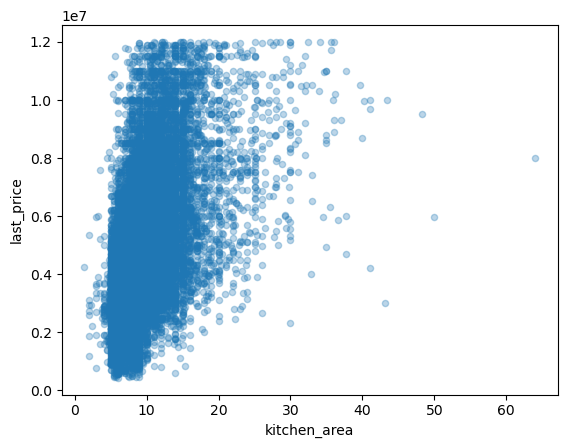

коэффициент корреляции: 0.49028741210151194


In [31]:
data.plot(kind='scatter', x='kitchen_area', y='last_price', alpha=0.3)
plt.show()

print('коэффициент корреляции:', data['last_price'].corr(data['kitchen_area']))

Диаграмма позволяет говорить о положительной корреляции площади кухни и стоимости квартиры, однако, коэффициент корреляции всего 0.49, что также говорит о снижении уровня линейной связи по сравнению с общей площадью.

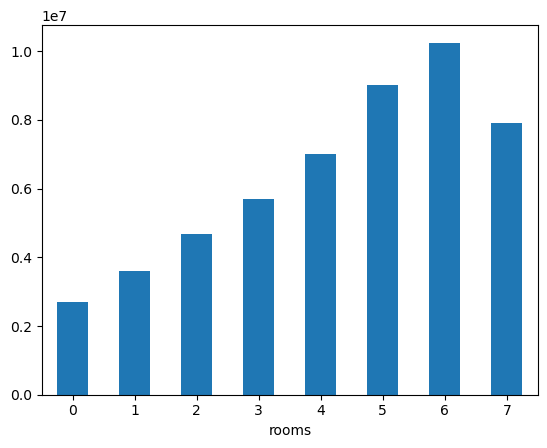

In [32]:
rooms_median_price = data.groupby('rooms')['last_price'].median()
rooms_median_price.plot(kind='bar', rot=0)
plt.show()

Все квартиры в выборке были разделены на группы по количеству комнат - от 0 до 7. Для каждой группы было определена медианная стоимость квартиры.
Диаграмма показывает прямую линейную зависимость между этими параметрами - чем больше комнат, тем выше медианная стоимость.
Снижение графика на группе '7 комнат' объясняется тем, что в выборке имеется только одна квартира с таким количеством комнат.

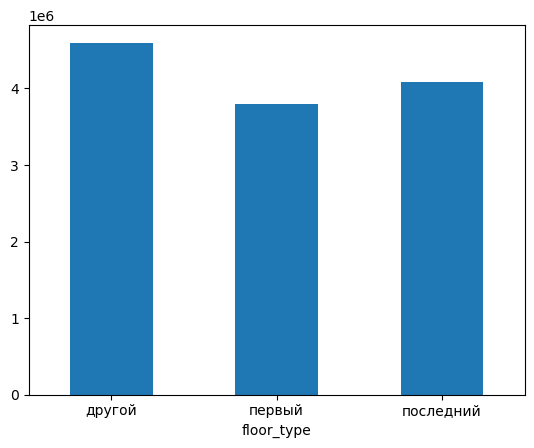

In [33]:
floor_type_median_price = data.groupby(['floor_type'])['last_price'].median()
floor_type_median_price.plot(kind='bar', rot=0)
plt.show()

Диаграмма позволяет предположить, что медианная стоимость квартир на первом этаже в целом ниже, чем стоимость квартир на других этажах.

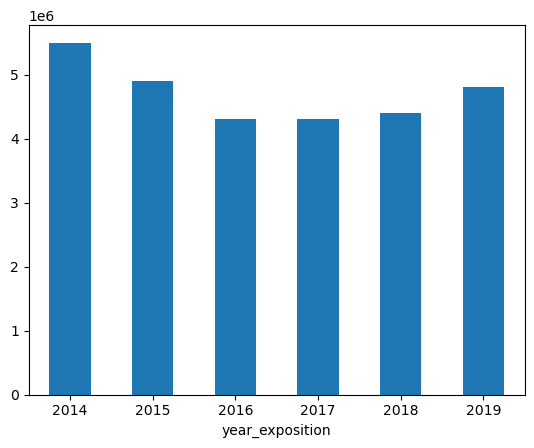

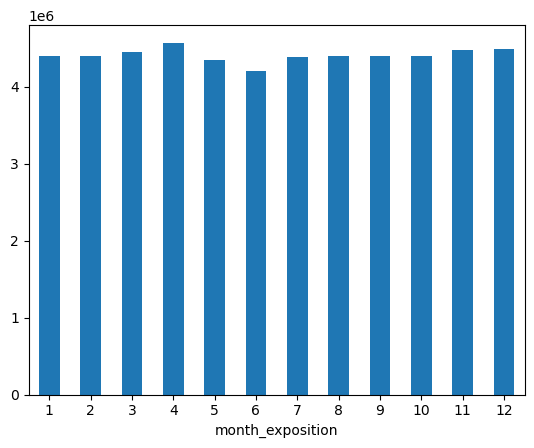

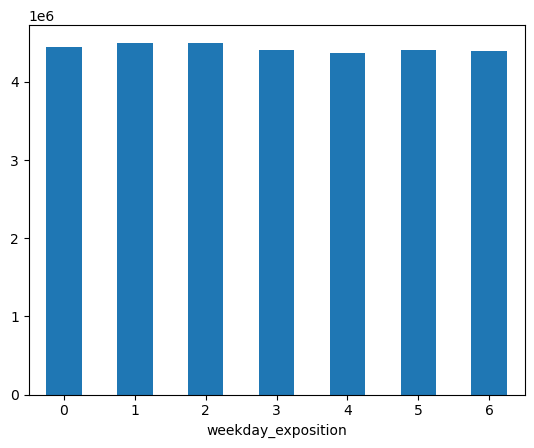

In [34]:
data['year_exposition'] = data['first_day_exposition'].apply(lambda date: date.year)
year_exposition_median_price = data.groupby('year_exposition')['last_price'].median()
year_exposition_median_price.plot(kind='bar', rot=0)
plt.show()

month_exposition_median_price = data.groupby('month_exposition')['last_price'].median()
month_exposition_median_price.plot(kind='bar', rot=0)
plt.show()

weekday_exposition_median_price = data.groupby('weekday_exposition')['last_price'].median()
weekday_exposition_median_price.plot(kind='bar', rot=0)
plt.show()

Графики зависимости медианной стоимости квартир от года, месяца и дня недели публикации объявления показывают, что месяцы и дни не влияют на стоимость квартир.
В период с 2014 по 2016 года медианная стоимость снижалась, а начиная с 2017 по 2019 - росла.

### Анализ стоимости квадратного метра в разных населенных пунктах

In [35]:
data['square_meter_price'] = data['last_price'] / data['total_area']

Рассчитаем среднюю стоимость кв. метра в каждом населенном пункте и выведем 10 населенных пунктов с наибольшим количеством объявлений

In [36]:
localities = data.groupby('locality_name').agg(
    locality_count=('locality_name', 'count'),
    mean_square_meter_price=('square_meter_price', 'mean')
)

# округляем..
localities['mean_square_meter_price'] = localities['mean_square_meter_price'].map(round)

most_frequency_localities = localities.sort_values(by='locality_count', ascending=False).head(10)
print(most_frequency_localities.sort_values(by='mean_square_meter_price', ascending=False))

                 locality_count  mean_square_meter_price
locality_name                                           
Санкт-Петербург           13789                   105503
Пушкин                      339                   100323
Кудрово                     470                    95152
Парголово                   327                    90176
Мурино                      590                    86088
Шушары                      440                    78677
Колпино                     336                    75185
Гатчина                     305                    68422
Всеволожск                  397                    67214
Выборг                      236                    57933


В топ-10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость кв. м - в Санкт-Петербурге, а минимальная - в Выборге.

### Анализ зависимости стоимости квартир в Санкт-Петербурге от расстояния до центра города

Вычислим среднюю цену каждого километра. Для этого сгруппируем все объекты из Санкт-Петербурга по расстоянию до центра города.

In [37]:
spb_price_per_km = data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_nearest_by_km').agg(
    mean_price=('last_price', 'mean'),
    median_price=('last_price', 'median'),
    flats_count=('cityCenters_nearest_by_km', 'count')
)

spb_price_per_km['mean_price'] = spb_price_per_km['mean_price'].map(round)
spb_price_per_km['median_price'] = spb_price_per_km['median_price'].map(round)

print(spb_price_per_km)

# создадим отдельный столбец для указания расстояния в каждой группе
spb_price_per_km['distances'] = pd.Series(spb_price_per_km.index)

                           mean_price  median_price  flats_count
cityCenters_nearest_by_km                                       
0.0                           8398000       7600000           10
1.0                           8254067       8500000          104
2.0                           8014224       8250000          183
3.0                           7419590       7360000          252
4.0                           7680381       7575000          472
5.0                           7682854       7500000          597
6.0                           7166816       6850000          415
7.0                           6708437       6325000          290
8.0                           6640097       6300000          471
9.0                           5575258       5000000          524
10.0                          5426309       4850000          653
11.0                          5347362       4900000         1092
12.0                          5287684       4850000         1522
13.0                     

В большинстве случаев медианное значение представляется более точным и не подверженным искажениям из-за единичных выбросов. Однако, в данном случае и среднее, и медианное значения показывают одинаковую тенденцию. Построим график зависимости средней и медианной цены от расстояния до центра. 

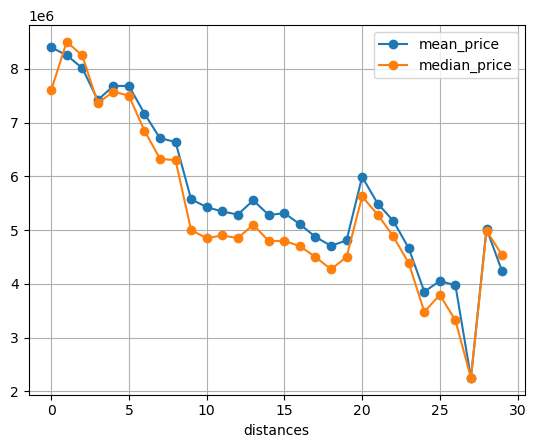

In [38]:
spb_price_per_km.plot(x='distances', y=['mean_price', 'median_price'], style='o-', grid=True)
plt.show()

График наглядно показывает следующую тенденцию - чем дальше от центра города, тем ниже средняя стоимость объектов недвижимости. Вместе с тем, на графике видны два нарушающих эту тенденцию пика - в районе 20 км и 27 км от центра. Чтобы выяснить их природу, посмотрим, сколько объектов включает каждая группа.

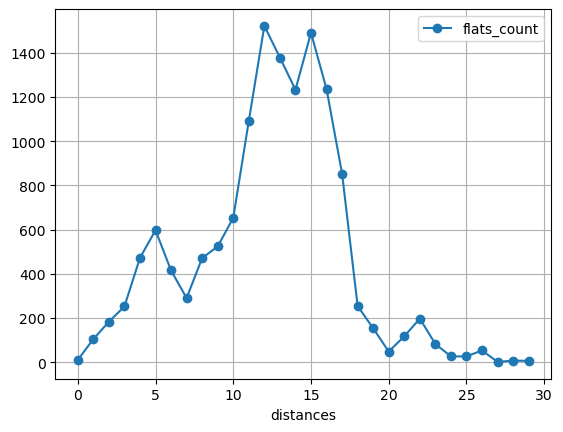

In [39]:
spb_price_per_km.plot(x='distances', y=['flats_count'], style='o-', grid=True)
plt.show()

Такой график позволяет утверждать, что пики значений обусловлены малочисленностью соответствующих им групп. Причем в таких группах мы наблюдаем резкое снижение количества объектов по сравнению с предшествующими им группами. В группе '19 км' 153 объекта, в в группе '20 км' -  48 объектов, в группе '26 км' 53 объекта, а в группе '27 км' - только 1 объект.
Поэтому такие пики на графике не должны влиять на наш вывод о снижении средней стоимости объектов недвижимости по мере увеличения расстояния до центра города.

Для дополнения аргументации выведем коэффиент корреляции между ценой и удаленностью от центра.

In [40]:
print(spb_price_per_km['distances'].corr(spb_price_per_km['mean_price']))

-0.8923449192494268


Коэффициент корреляции также говорит о наличии существенной обратной линейной связи между ценой объекта недвижимости и расстоянием до центра города

# Общий вывод

**Цель исследования** - поиск и описание закономерностей и зависимостей между различными факторами на рынке недвижимости в Санкт-Петербурге и соседних населенных пунктах.

Для проведения исследования использовался архив объявлений сервиса Яндекс Недвижимость о продаже более чем 23 тысяч квартир за 2015-2019 годы.

**Задачи исследования:**
* подготовить данные к анализу (обработать пропуски значений и дубликаты, при необходимости конвертировать данные в правильные типы)
* ответить на поставленные в задании для исследования вопросы, касающиеся динамики рынка недвижимости и степени влияния отдельных факторов на стоимость объектов недвижимости

В ходе данной работы были получены следующие результаты.

## 1. Анализ скорости продажи квартир

Требовалось изучить, как быстро продавались квартиры, в т.ч. найти среднюю скорость их продаж, а также определить, какие продажи можно считать быстрыми, а какие слишком долгими.

Представленная для исследования база объявлений о продаже содержит данные о длительности размещения каждого объявления - со дня публикации до дня продажи. Диапазон таких сроков очень широк - от 1 дня до 1580 дней.

Анализ показал, что четверть продаж осуществляется в срок до 45 дней, и такие продажи можно считать 'быстрыми'.

Среднее значение скорости продаж - 95 дней. И половина всех продаж осуществляется в период от 45 до 230 дней.

При этом значительное количество продаж существенно отклоняется от среднего показателя. Почти 8 500 продаж (35% от общего числа) осуществлены в период от 95 до 500 дней. Это продажи долгие, но не выходящие за пределы стандартного отклонения от среднего для данной выборки.

Однако, было обнаружено 1749 продаж, выходящих за пределы 500 дней. Такие продажи можно считать необычно долгими.

## 2. Анализ факторов, влияющих на стоимость квартир

Были поставлен следующий вопрос: зависит ли стоимость квартиры от
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира;
* даты размещения объявления о продаже.

Каждый фактор был проанализирован отдельно. С целью определения степени их влияния на стоимость были построены графики распределения, визуализирующие зависимость между величинами. Также находился коэффициент корреляции между значением фактора и итоговой ценой квартиры.

2.1. Между стоимость и общей, жилой и кухонной площадью квартиры, безусловно, существует положительная корреляция. Влияние общей площади более выражено по сравнению с влиянием жилой площади и площади кухни.

2.2. С увеличением количества комнат средняя стоимость квартир также увеличивается.

2.3. Для анализа зависимости цены квартиры от этажа все объекты, содержащиеся в исследуемой базе были разделены на три группы: первый этаж, последний этаж, другой этаж (все этажи, кроме первого и последнего).
Существеннее всего на стоимости квартиры сказывается размещение на первом этаже. Квартиры на первом этаже в целом дешевле квартир на других этажах, в т.ч. последнем. 

Так, медианная цена квартир в группе 'другие этажи' составила 4 600 000 рублей, в то время как медианная цена квартир на 1 этаже составила 3 800 000 рублей, т.е. на 800 000 меньше.

2.4. Анализ влияния на цену даты размещения объявления о продаже включал в себя анализ отдельно дня недели, месяца и года размещения объявления.
Год публикации объявления влияет на цену квартир. В период с 2014 по 2016 года наблюдается снижение медианной стоимости квартир, а начиная с 2017 по 2019 - ее рост.
Напротив, какое-либо влияние дня недели и месяца не было выявлено.

## 3. Сравнительный анализ стоимости квадратного метра в различных населенных пунктах

В ходе работы была выделена группа из 10 населенных пунктов с наибольшим количеством объявлений.
* Санкт-Петербург, количество объявлений - 13 789
* Мурино, количество объявлений - 590
* Кудрово, количество объявлений - 470
* Шушары, количество объявлений - 440
* Всеволожск, количество объявлений - 397
* Пушкин, количество объявлений - 339
* Колпино, количество объявлений - 336
* Парголово, количество объявлений - 327
* Гатчина, количество объявлений - 305
* Выборг, количество объявлений - 236

Для этих населенных пунктов была рассчитана средняя цена одного квадратного метра.
* Санкт-Петербург, средняя цена кв. м - 105 503
* Мурино, средняя цена кв. м - 86 088
* Кудрово, средняя цена кв. м - 95 152
* Шушары, средняя цена кв. м - 78 677
* Всеволожск, средняя цена кв. м - 67 214
* Пушкин, средняя цена кв. м - 100 323
* Колпино, средняя цена кв. м - 75 185
* Парголово, средняя цена кв. м - 90 176
* Гатчина, средняя цена кв. м - 68 422
* Выборг, средняя цена кв. м - 57 933

При этом населенным пунктом с наибольшей средней стоимостью кв. м является Санкт-Петербург.
Наименьшая средняя стоимость кв. м - в Выборге.

## 4. Зависимость стоимости квартиры в Санкт-Петербурге от расстояния до центра города

Все квартиры в исследуемой базе, находящиеся в Санкт-Петербурге, были разделены на группы, исходя из расстояния до центра - 0 км, 1 км, 2 км и т.д. Всего таких групп получилось 30, с максимальным расстоянием до центра - 29 км.
Для каждой группы была рассчитана средняя стоимость квартиры. Это позволило проанализировать зависимость цены от расстояния от центра города.

В ходе анализа было наглядно продемонстрировано, что средняя стоимость квартир снижается по мере удаления от центра. Коэффициент корреляции этих величин составил -0.89. Такой коэффициент говорит о значительной обратной зависимости.